In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

penas_criminais = pd.read_excel("Dados_penas.xlsx")
penas_criminais['Pena média'] = (penas_criminais['Pena mínima'] + penas_criminais['Pena máxima'])/2

penas_criminais

,Crime,Pena mínima,Pena máxima,Pena média
0,Homicídio Doloso,6.000000,20.0,13.000000
1,Lesão Corporal seguida de Morte,4.000000,12.0,8.000000
2,Latrocínio,20.000000,30.0,25.000000
3,Tentativa de Homicídio,6.000000,20.0,13.000000
4,Lesão Corporal Dolosa,1.000000,5.0,3.000000
5,Estupro,6.000000,30.0,18.000000
6,Homicídio Culposo,1.000000,3.0,2.000000
7,Lesão Corporal Culposa,0.166667,1.0,0.583333
8,Roubo a Comércio,4.000000,10.0,7.000000
9,Roubo a Residência,4.000000,10.0,7.000000


*Plotagem das médias penais das variáveis*

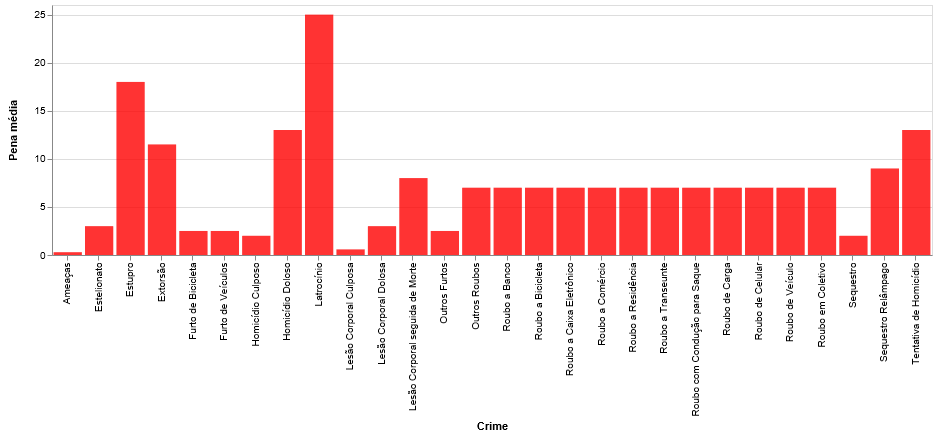

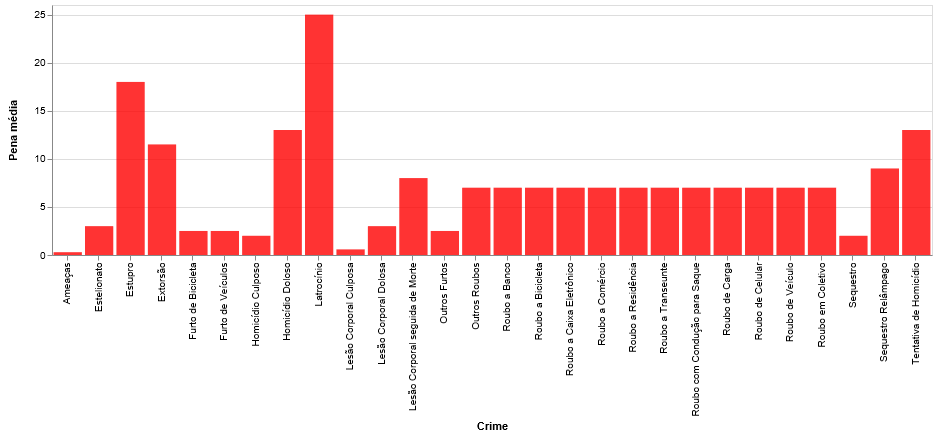

In [3]:
chart = alt.Chart(penas_criminais).mark_bar().encode(
    x='Crime',
    y='Pena média'
).configure_mark(
    opacity=0.8,
    color='red'
).properties(
  width=880,
  height=250
)

chart

In [4]:
import Dados as dd
import numpy as np
dd.grupo_mun_mean.head()

,Região,Homicídio Doloso,Lesão Corporal seguida de Morte,Latrocínio,Tentativa de Homicídio,Lesão Corporal Dolosa,Estupro,Homicídio Culposo,Lesão Corporal Culposa,Roubo a Comércio,...,Roubo a Bicicleta,Outros Roubos,Furto de Veículos,Furto de Bicicleta,Outros Furtos,Sequestro,Extorsão,Sequestro Relâmpago,Estelionato,Ameaças
Município,,,,,,,,,,,,,,,,,,,,,
Angra dos Reis,4.0,4.024302,0.009325,0.027672,6.631264,31.384496,3.207191,1.153060,10.778138,3.028683,...,0.00000,2.442033,6.130586,0.148074,36.590714,0.0,0.352668,0.018005,7.770104,30.154671
Aperibé,4.0,0.000000,0.000000,0.000000,0.468527,8.931273,0.468527,0.152443,2.004154,0.461061,...,0.00000,0.156176,1.539360,0.304885,5.997530,0.0,0.000000,0.000000,0.152443,8.782563
Araruama,4.0,4.057463,0.014764,0.112711,3.738954,37.723897,3.059342,1.905831,27.410477,2.829682,...,0.04204,4.638323,9.421322,0.857722,70.329922,0.0,0.411861,0.000000,14.625759,38.665983
Areal,4.0,0.000000,0.000000,0.000000,0.143905,6.235799,0.725771,0.000000,0.875923,0.145987,...,0.00000,0.145987,0.867593,0.000000,4.648682,0.0,0.145987,0.000000,0.289892,6.669595
Armação dos Búzios,4.0,4.112008,0.058665,0.110464,5.465342,57.374645,3.933958,1.337020,27.143589,2.903053,...,0.00000,13.313383,16.677391,0.480374,169.539040,0.0,1.540328,0.000000,24.511614,65.712294


**Criação do índice de criminalidade:**

In [6]:
array_media = np.array(dd.grupo_mun_mean)[:, 1:]
indices = np.average(array_media, weights = penas_criminais['Pena média'], axis = 1)
indices = pd.DataFrame(indices)
indices.index = dd.grupo_mun_mean.index
indices[2] = dd.grupo_mun_mean['Região']
indices.columns = ['Índice', 'Região']
indices

,Índice,Região
Município,,
Angra dos Reis,3.044996,4.0
Aperibé,0.370516,4.0
Araruama,3.928197,4.0
Areal,0.282802,4.0
Armação dos Búzios,6.336128,4.0
Arraial do Cabo,3.700434,4.0
Barra Mansa,2.218768,4.0
Barra do Piraí,1.969089,4.0
Belford Roxo,4.484615,1.0


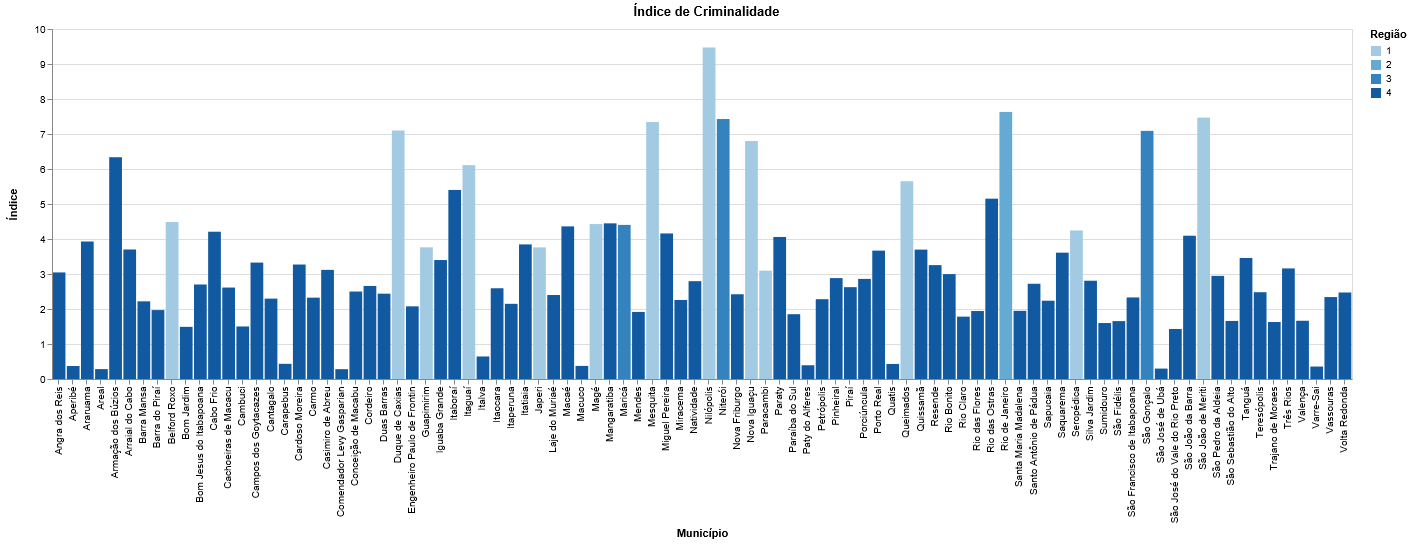

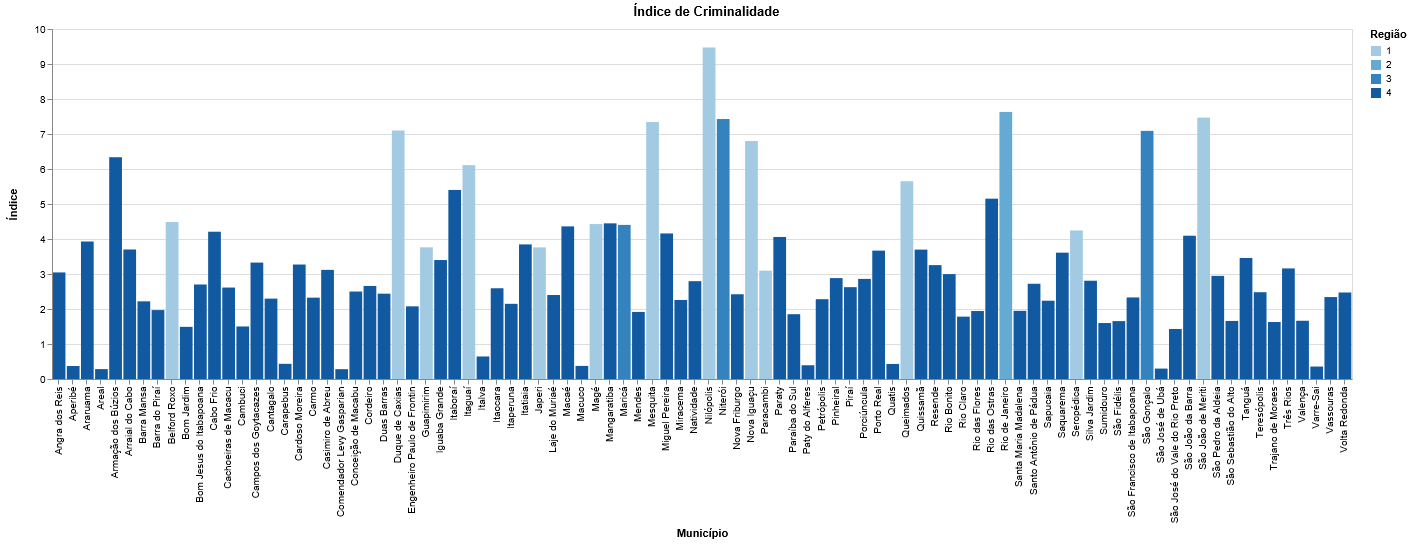

In [12]:
chart = alt.Chart(indices.reset_index()).mark_bar().encode(
    x = 'Município',
    y = 'Índice',
    color = 'Região:O'
).properties(
    width=1300,
    height=350,
    title= 'Índice de Criminalidade'
)
chart